# Triple Line Junctions

**Objective**: Calculate the misorientation angle at the *triple line junction* of deformation twinning in 10M Ni-Mn-Ga

### Import packages

In [1]:
## numpy: package for cumputing numerical arrays
from numpy.linalg import inv #inverse of a matrix
import numpy as np
np.set_printoptions(precision=4) #precision of arrays

## matplotlib: package for plotting
from matplotlib import pyplot as plt
%matplotlib inline

## import functions from twinning
from twinning import *

### 10M Ni-Mn-Ga

1. Lattice parameters
2. Irrational element of NC twins

In [2]:
## lattice parameters
a,b,c,gamma = [0.5972, 0.5944, 0.5584, np.deg2rad(90.37)] #NMG lattice parameter: Seiner et al. (2019)
#a,b,c,gamma = [1., 0.97, 0.94, np.deg2rad(94)] #Exaggerated lattice

## irrational element of NC twins
q3 = (2*a*b*np.cos(gamma) - np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)
q4 = (2*a*b*np.cos(gamma) + np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)

### Transformation Relation

#### $V_1$

Crystal Coordiante Frame ($V_1$) $\leftrightarrow$ Reference Frame ($R$): $^R\mathbf{P}^{V_1}$

In [3]:
## Transformation: R → V1
rPv1 = np.array([[1,b/a*np.cos(gamma),0],[0,-b/a*np.sin(gamma),0],[0,0,-c/a]])

$V_1$ lattice vectors: $\boldsymbol{a}$ & $\boldsymbol{b}$

[[ 1.     -0.0064  0.    ]
 [ 0.     -0.9953  0.    ]
 [ 0.      0.     -0.935 ]]


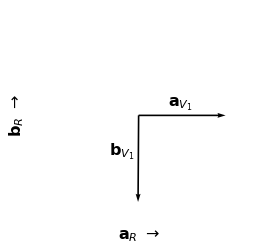

In [4]:
print(rPv1)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv1)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{V_1}$',fontsize=16) #label vector a
ax.text(-0.015,-0.02,r'$\mathbf{b}_{V_1}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

### Orientation Relationship

| Variant Transformation | Twin Type        | Twin Boundary |
| :--------------------: | :--------------: | :-----------: |
| $V_1 \to V_4$          | Non-conventional | $(1 q_3 0)_m$ |
| $V_4 \to V_2$          | Compound         | $(1 1 0)_m$   |
| $V_2 \to V_3$          | Non-conventional | $(1 q_3 0)_m$ |
| $V_3 \to V_4$          | Compound         | $(1 0 0)_m$   |


#### $V_4$

Orientation relationship

In [5]:
## Orientation Relationship   rL: V₁ → V₄ 

#(1 q3 0) NC twins
rL_v1tov4 = OR_NCtwins([1,q3,0],[q3,-1,0],rPv1,a)
#rL_v1tov4 = rotationmatrix(rPv1 @ [0,0,1],np.pi/2)

#Transformation relation: R ↔ V₄
rPv4 = rL_v1tov4 @ rPv1; del rL_v1tov4
#print(rPv4); print()

Angle between TB pair: $(100)_{V_4}$ & $(110)_{V_4}$

In [6]:
## Angle between (100) and (110) pair
alpha1 = angleTBpair(rPv4,[1,0,0],[1,1,0])
print('angle between (100) and (110) pair: %.4f degrees' % alpha1)

angle between (100) and (110) pair: 44.9488 degrees


$V_4$ lattice vectors: $\boldsymbol{a}$ & $\boldsymbol{b}$

[[-0.008  -0.9952  0.    ]
 [-1.      0.0144  0.    ]
 [ 0.      0.     -0.935 ]]


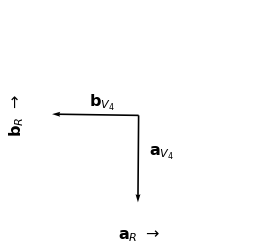

In [7]:
print(rPv4)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv4)

ax.text(+0.005,-0.02,r'$\mathbf{a}_{V_4}$',fontsize=16) #label vector a
ax.text(-0.025,+0.005,r'$\mathbf{b}_{V_4}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

#### $V_2$

Orientation relationship

In [8]:
## Orientation Relationship   rL: V₄ → V₂

#(1 1 0) compound twin
rL_v4tov2 = rotationmatrix([1,1,0]@inv(rPv4),np.pi)

#Transformation relation: R ↔ V₂
rPv2 = rL_v4tov2 @ rPv4; del rL_v4tov2
#print(rPv2); print()

Angle between TB pair: $(1 q_3 0)_{V_2}$ & $(110)_{V_2}$

In [9]:
## Angle between (1 q3 0) and (110) pair
alpha2 = 180 - angleTBpair(rPv2,[1,q3,0],[1,1,0])
print('angle between (1 q3 0) and (110) pair: %.4f degrees' % alpha2)

angle between (1 q3 0) and (110) pair: 117.3403 degrees


$V_2$ lattice vectors: $\boldsymbol{a}$ & $\boldsymbol{b}$

[[-0.9998 -0.0126  0.    ]
 [ 0.0191 -0.9952  0.    ]
 [ 0.      0.      0.935 ]]


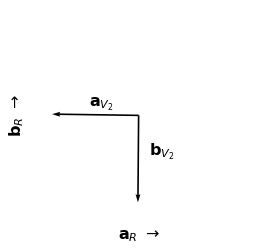

In [10]:
print(rPv2)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv4)

ax.text(+0.005,-0.02,r'$\mathbf{b}_{V_2}$',fontsize=16) #label vector a
ax.text(-0.025,+0.005,r'$\mathbf{a}_{V_2}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

#### $V_3$

Orientation relationship

In [11]:
## Orientation Relationship   rL: V₂ → V₃

#(1 q3 0) NC twin
rL_v2tov3 = OR_NCtwins([1,q3,0],[q3,-1,0],rPv2,a)
#rL_v2tov3 = rotationmatrix(rPv2 @ [0,0,1],np.pi/2)

#Transformation relation: R ↔ V₃
rPv3 = rL_v2tov3 @ rPv2; del rL_v2tov3
#print(rPv3); print()

TB pair: $(q_3 \bar{1} 0)_{V_3}$ & $(100)_{V_3}$

In [12]:
## Angle between (q3 -1 0) and (1 0 0) pair
alpha3 = 180 + angleTBpair(rPv3,[q3,-1,0],[1,0,0])
print('angle between (q3 -1 0) and (100) pair: %.4f degrees' % alpha3)

angle between (q3 -1 0) and (100) pair: 198.0660 degrees


$V_3$ lattice vectors: $\boldsymbol{a}$ & $\boldsymbol{b}$

[[-0.0111  0.9953  0.    ]
 [-0.9999 -0.0046  0.    ]
 [ 0.      0.      0.935 ]]


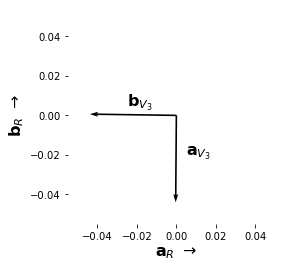

In [13]:
print(rPv3)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv4)

ax.text(+0.005,-0.02,r'$\mathbf{a}_{V_3}$',fontsize=16) #label vector a
ax.text(-0.025,+0.005,r'$\mathbf{b}_{V_3}$',fontsize=16) #label vector b

#ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

### Sum of Angles

In [14]:
sum_of_angles = alpha1+alpha2+alpha3
print('sum of angles: %.4f degrees' % sum_of_angles)
print()

disclination_angle = sum_of_angles - 360
print('disclination angle: %.4f degrees' % disclination_angle)

sum of angles: 360.3551 degrees

disclination angle: 0.3551 degrees
